In [1]:
!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 646.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 47.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

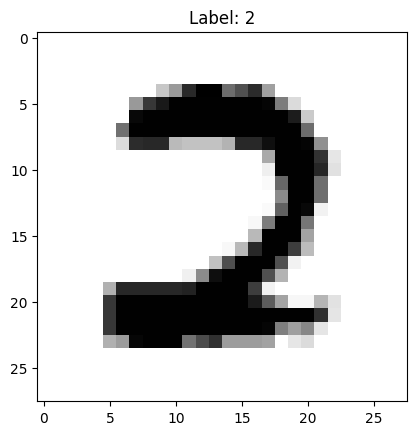

In [7]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                               ])
trainset = datasets.MNIST('./data', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

dataiter = iter(trainloader)
images, labels = next(dataiter)

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');
plt.title(f"Label: {labels[0].item()}")
plt.show()

In [8]:
import torch.nn as nn
import torch.nn.functional as F

In [11]:
class Simplenet(nn.Module):
  def __init__(self):
    super(Simplenet,self).__init__()
    self.fc1=nn.Linear(28*28,128)
    self.fc2=nn.Linear(128,10)
  def forward(self,x):
    x=x.view(-1,28*28)
    x=F.relu(self.fc1(x))
    x=self.fc2(x)
    return x
model = Simplenet()
print(model)

Simplenet(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [14]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 5
for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        output=model(images)
        loss=criterion(output,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs} - Loss: {running_loss/len(trainloader)}")

print("Training complete!")


Epoch 1/5 - Loss: 0.3093380261776544
Epoch 2/5 - Loss: 0.28869762633051443
Epoch 3/5 - Loss: 0.2709830169405129
Epoch 4/5 - Loss: 0.2534542359800926
Epoch 5/5 - Loss: 0.23739587388900932
Training complete!


In [16]:
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy on test images: {accuracy:.2f}%")

Accuracy on test images: 93.43%


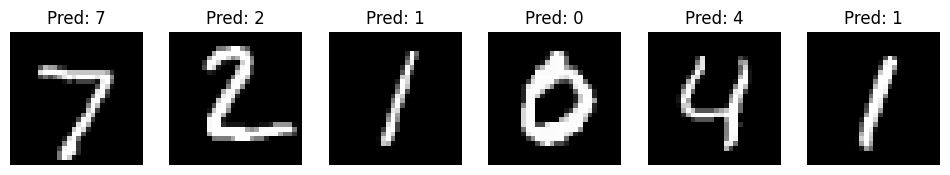

In [17]:
dataiter = iter(testloader)
images, labels = next(dataiter)


outputs = model(images)
_, predicted = torch.max(outputs, 1)


fig, axes = plt.subplots(1, 6, figsize=(12, 4))
for idx in range(6):
    axes[idx].imshow(images[idx].numpy().squeeze(), cmap='gray')
    axes[idx].set_title(f"Pred: {predicted[idx].item()}")
    axes[idx].axis('off')

plt.show()